In [4]:
# Manipulación de datos
import pandas as pd

# Operaciones numéricas
import numpy as np

# Para medir el tiempo que toma ejecutar los procesos
from time import time

# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Librería para SVM (Support Vector Machine)
from sklearn.svm import SVC

# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix

# Generar gráficos
import matplotlib.pyplot as plt

In [ ]:
# Leemos el set de datos y lo cargamos en la variable diabetes_df, que es un DataFrame
diabetes_df = pd.read_csv('diabetes.csv')   

# Mostrar información sobre el conjunto de datos
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Mostrar las primeras 50 filas del DataFrame
diabetes_df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
# Contar los valores únicos de la columna 'Outcome' en el DataFrame
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
# Creamos un nuevo DataFrame llamado X con las columnas de características
# Se obtiene generando una lista de columnas del DataFrame original
lista_caract = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'    
]

In [12]:
# Luego, tomamos esas columnas del DataFrame original
X = diabetes_df[lista_caract]

In [13]:
# Mostramos los primeros cinco registros para conocer cómo se compone
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
#Utilizaremos el mismo procedimiento para generar y
lista_etiq=['Outcome']
y=diabetes_df[lista_etiq]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [15]:
#Separar en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y
)  

In [18]:
#Mostraremos la cantidad a utilizar
X_train.shape
y_train.shape

(576, 1)

In [19]:
#Luego, la cantidad de datos a utilozar para
X_test.shape
y_test.shape

(192, 1)

In [20]:
#Maquina de soporte
clf=SVC(kernel='linear')

In [21]:
#Guardamos el registro del momento en el que empezamos
hora_inicio=time()

In [22]:
#Iniciamos el entrenamiento ejecutando el metodo fit
#Los valores que enviamos son los valores de X y y
#
# El .ravel() que final de y.values es un pequeño truco patra cambiar su forma 
#esto permite convertir una matriz de dos dimensiones en una sola dimnsion
#con ello,  cada elemento de esta nueva matriz corresponde a un registro cd X
clf.fit(X_train.values, y_train.values.ravel())

SVC(kernel='linear')

In [23]:
#Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamineto terminado en {} segundos".format(time()- hora_inicio))

Entrenamineto terminado en 30.048147916793823 segundos


In [24]:
#Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio= time()
#Iniciamos la prediccion con nuestra X de prueba
y_pred = clf.predict(X_test)
#Mostramos el tiempo tomado para la predicción
print("Prediccion terminada en {} segundos" .format(time()-hora_inicio))

Prediccion terminada en 0.004124879837036133 segundos


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [25]:
#Evaluamos la precision
accuracy_score(y_test,y_pred)

0.7604166666666666

In [26]:
#Matriz de cofusion: Nos ayuda a tener una mejor idea del rendimiento de nuestro rendimiento de datos de prueba(y_test en este caso) y nuestros datos calculados(y_pred en este caso)
#la funcion confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
#genera una matriz que indica, para cada clase, la canbtidad de predicciones correctas
conf_diabetes= confusion_matrix(y_test, y_pred)
conf_diabetes

array([[117,  11],
       [ 35,  29]], dtype=int64)

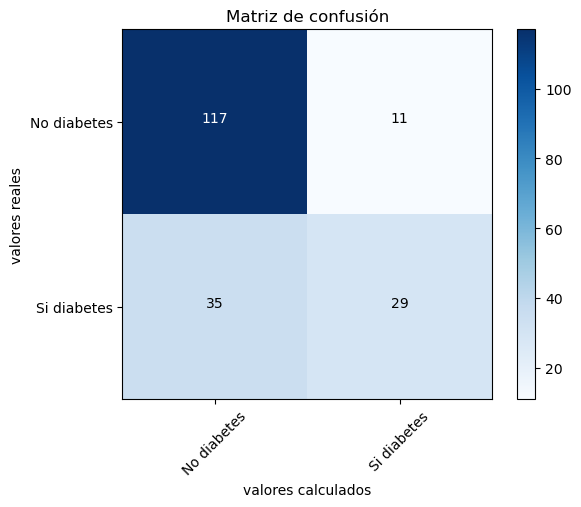

In [30]:

def plot_cm(cm, classes):
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh=cm.max()/2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color="white"
            else:
                color="black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"  
            )
    plt.ylabel("valores reales")
    plt.xlabel("valores calculados")
    plt.show()

#Generamos el grafico llamadp la funcion que creamos y envindo los parametros
#cm  muestra matriz de confusion (conf_diabetes)
#clases = las clases a predecir (si tienen diabetes o no)
plot_cm(conf_diabetes, ['No diabetes', 'Si diabetes'])

    